In [24]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
from pandas.tseries.offsets import Hour

In [25]:

df1 = pd.read_csv('Naive_errors.csv', index_col=0)
df2 = pd.read_csv('acfARIMA_errors_final.csv',index_col=0)
df3 = pd.read_csv('autoARIMA_errors_final.csv',index_col=0)
df4 = pd.read_csv('LSTM_errors_notscaled.csv',index_col=0)
df5 = pd.read_csv('GBDT_errors.csv',index_col=0)
df6 = pd.read_csv('LSTM_errors_notscaled_random.csv',index_col=0)
df7 = pd.read_csv('GBDT_errors_randomsearch.csv',index_col=0)
LSTM_season4 = pd.read_csv('LSTM_errors_scaled_season4.csv',index_col=0)

In [26]:
def computeMSEevery5(df):
    
    Result = []
    for col in df.columns:
        
        Result.append(df[col].mean())
        
    Result
    
    return Result
        

In [27]:
def computeSTDevery5(df):
    
    Result = []
    for col in df.columns:
        
        Result.append(df[col].std())
        
    Result
    
    return Result

In [28]:
Naive = computeMSEevery5(df1)
acf = computeMSEevery5(df2)
auto = computeMSEevery5(df3)
LSTM = computeMSEevery5(df4)
GBDT = computeMSEevery5(df5)
LSTM_rand = computeMSEevery5(df6)
GBDT_rand = computeMSEevery5(df7)
LSTM_s4 = computeMSEevery5(LSTM_season4)

In [29]:
print(Naive)

[16.966240333320624, 3.851532942723831, 3.851532942723831, 8.060414107696444]


In [30]:
print(acf)

[58.44932574104786, 43.77067292916146, 16.282332393527707, 39.854061596166915]


In [31]:
print(auto)

[58.44932574104786, 43.66330530987161, 16.282332393527707, 39.854061596166915]


In [32]:
print(LSTM)

[19.014287748988373, 13.125346742698545, 11.77575344039657, 31.366956085075245]


In [33]:
print(LSTM_s4)

[13.104122987794272]


In [34]:
print(GBDT)

[19.470549634429627, 5.304451799367604, 2.514716321907055, 8.762090947180802]


In [35]:
print(LSTM_rand)

[16.850289525370094, 4.707602846775492, 4.66991880265833, 9.090623121398975]


In [36]:
print(GBDT_rand)

[15.581833155727896, 3.680316978751385, 2.3930416838428115, 6.66257906697462]


In [37]:
LSTM[3] = LSTM_s4[0]

In [38]:
d = {'Naive':Naive,'ARIMA ACF':acf,'AUTO-ARIMA':auto,'LSTM':LSTM,'LSTM Random search':LSTM_rand,'GBDT':GBDT,'GBDT Random search':GBDT_rand}

df_MSEs = pd.DataFrame({k:pd.Series(v) for k,v in d.items()})
df_MSEs['seasons'] = ['season 1', 'season 2', 'season 3', 'season 4']
df_MSEs = df_MSEs.set_index('seasons')

In [39]:
df_MSEs.transpose()

seasons,season 1,season 2,season 3,season 4
Naive,16.966240,3.851533,3.851533,8.060414
ARIMA ACF,58.449326,43.770673,16.282332,39.854062
AUTO-ARIMA,58.449326,43.663305,16.282332,39.854062
LSTM,19.014288,13.125347,11.775753,13.104123
LSTM Random search,16.850290,4.707603,4.669919,9.090623
GBDT,19.470550,5.304452,2.514716,8.762091
GBDT Random search,15.581833,3.680317,2.393042,6.662579


In [40]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


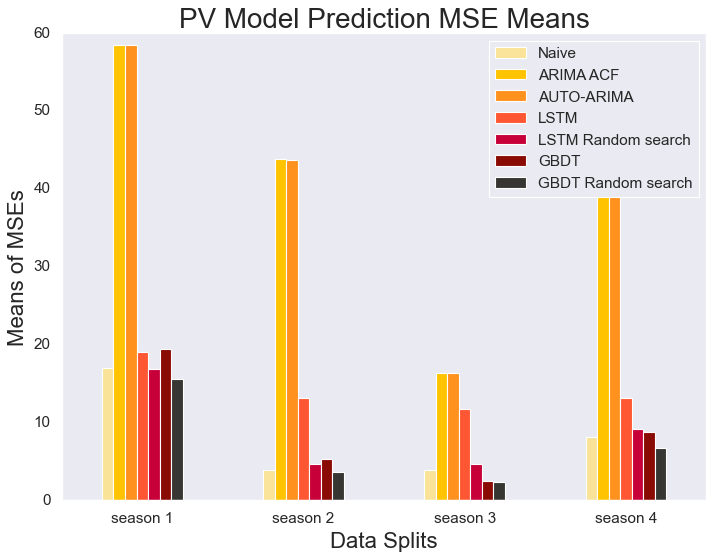

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10.4,7.3)},font_scale=1.25)
sns.set_style("dark")
#FEF4D9
df_MSEs.plot(kind="bar", color = ['#F9E399','#FFC300','#FF911E','#FF5733','#C70039','#8A0B03','#373633'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title('PV Model Prediction MSE Means',fontsize=25)
plt.xlabel("Data Splits",fontsize=20)
plt.ylabel("Means of MSEs",fontsize=20)
plt.savefig('PVMSE.png')

In [42]:
Naive = computeSTDevery5(df1)
acf = computeSTDevery5(df2)
auto = computeSTDevery5(df3)
LSTM = computeSTDevery5(df4)
GBDT = computeSTDevery5(df5)
LSTM_rand = computeSTDevery5(df6)
GBDT_rand = computeSTDevery5(df7)
#Tried to improve season 4
LSTM_s4 = computeSTDevery5(LSTM_season4)

In [43]:
LSTM[3]=LSTM_s4[0]

In [44]:
d = {'Naive':Naive,'acf':acf,'auto':auto,'LSTM':LSTM,'LSTM_rand':LSTM_rand,'GBDT':GBDT,'GBDT_rand':GBDT_rand}

df_MSEs = pd.DataFrame({k:pd.Series(v) for k,v in d.items()})
df_MSEs['seasons'] = ['season 1', 'season 2', 'season 3', 'season 4']
df_MSEs = df_MSEs.set_index('seasons')

In [45]:
df_MSEs.transpose()

seasons,season 1,season 2,season 3,season 4
Naive,68.626453,15.021877,15.021877,33.868318
acf,123.374073,98.424934,29.447861,77.326622
auto,123.374073,104.494932,29.447861,77.326622
LSTM,53.237472,30.993544,23.213447,37.582959
LSTM_rand,62.975514,14.805874,14.445550,35.369681
GBDT,55.146986,25.551437,11.691946,35.699156
GBDT_rand,55.637272,16.300452,11.992422,31.099867


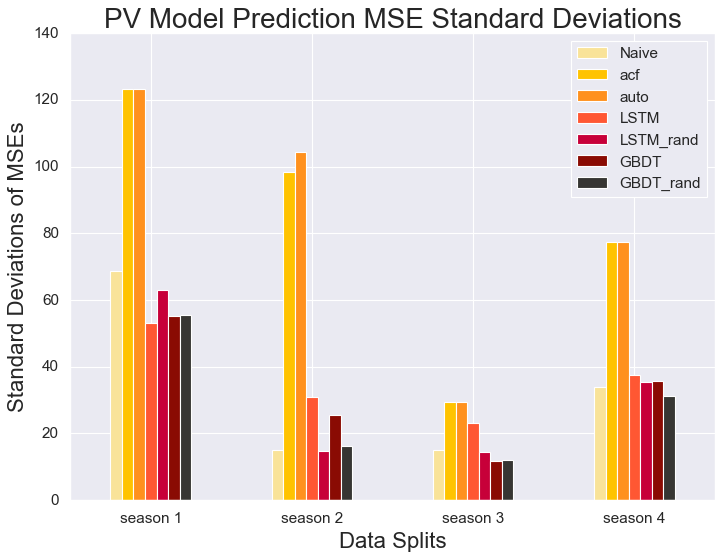

In [22]:
sns.set(rc={'figure.figsize':(10.4,7.3)},font_scale=1.25)
sns.set_style()

df_MSEs.plot(kind="bar", color = ['#F9E399','#FFC300','#FF911E','#FF5733','#C70039','#8A0B03','#373633'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title('PV Model Prediction MSE Standard Deviations',fontsize=25)
plt.xlabel("Data Splits",fontsize=20)
plt.ylabel("Standard Deviations of MSEs",fontsize=20)
plt.savefig('PVSD.png')